## I. Introduction
LeNet (or LeNet-5) is a convolutional neural network structure proposed by Yann LeCun, Léon Bottou, Yoshua Bengio, and Patrick Haffner in 1989. The first purpose of this network is to recognize handwritten digits in images. It was successfully applied for identifying handwritten zip code numbers provided by the US Postal Service [1].


## II. Architechture
LeNet consists of 2 parts: 
- The first part includes two convolutional layers and two pooling layers which are placed alternatively. 
- The second part consists of three fully connected layers. 

The architecture of LeNet is described by the following figure:
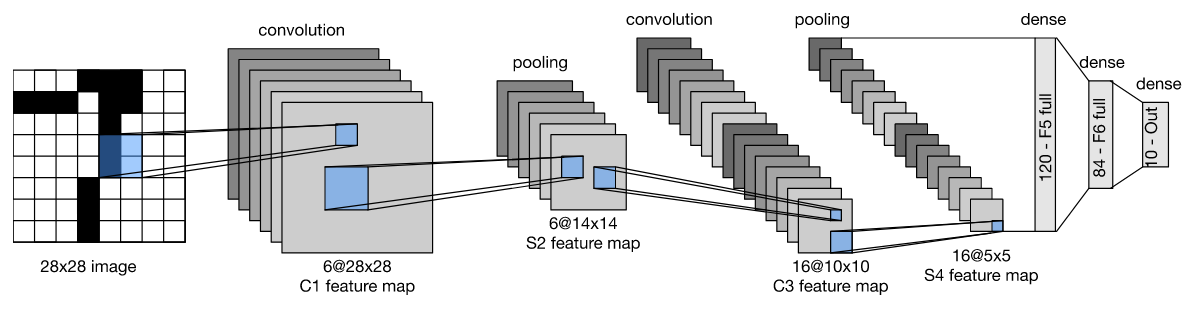

In the figure above, Cx, Sx, Fx are corresponding to the convolutional layer, sub-sampling layer (a.k.a pooling layer), and fully connected layer, respectively, where x denotes the layer index. 
- The input is images of size 28 × 28
- C1 is the first convolutional layer with 6 convolution kernels of size 5× 5.
- S2 is the pooling layer that outputs 6 channels of 14 × 14  images. The pooling window size, in this case, is a square matrix of size 2 × 2.
- C3 is a convolutional layer with 16 convolution kernels of size 5 × 5. Hence, the output of this layer is 16 feature images of size 10 × 10.
- S4 is a pooling layer with a pooling window of size 2 × 2. Hence, the dimension of images through this layer is halved, it outputs 16 feature images of size 5 × 5. 
- C5 is the convolutional layer with 120 convolution kernels of size 5 × 5. Since the inputs of this layer have the same size as the kernel, then the output size of this layer is 1 × 1. The number of channels in output equals the channel number of kernels, which is 120. Hence the output of this layer is 120 feature images of size 1 × 1. 
- F6 is a fully connected layer with 84 neurons which are all connected to the output of C5.
- The output layer consists of 10 neurons corresponding to the number of classes (numbers from 0 to 9).

### III. Application for recognizing MNIST hanwritten digit images 
In this section, we apply LeNet for recognizing MNIST handwritten digit images. This network is constructed in Keras platform:

### 1. Loading MNIST dataset

In [1]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [2]:
print('X_train shape', X_train.shape, 'X_test shape', X_test.shape)

X_train shape (60000, 28, 28) X_test shape (10000, 28, 28)


In [3]:
type(X_train)

numpy.ndarray

Visualizing randomly some images in the training set:

In [4]:
import matplotlib.pyplot as plt 
import random

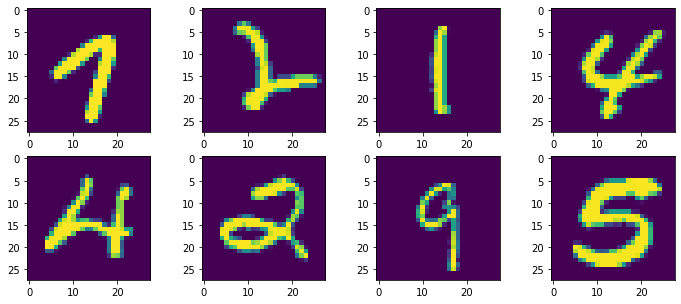

In [5]:
plt.figure(figsize = (12,5))
for i in range(8):
  ind = random.randint(0, len(X_train))
  plt.subplot(240+1+i)
  plt.imshow(X_train[ind])

### 2. Preprocessing data
This task includes the following steps:

- Reshape images into required size of Keras
- Convert integer values into float values
- Normalize data
- One-hot encodeing labels

In [6]:
from tensorflow.keras.utils import to_categorical

In [7]:
def preprocess_data(X_train, y_train, X_test, y_test):
  # reshape images to the the required size by Keras
  X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
  X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
  # convert from integers to floats
  X_train = X_train.astype('float32')
  X_test = X_test.astype('float32')
  # normalize to range 0-1
  X_train = X_train/255.0
  X_test_norm = X_test/255.0
  # One-hot encoding label 
  y_train = to_categorical(y_train)
  y_test = to_categorical(y_test)
  return X_train, y_train, X_test, y_test 

## 3. Buiding the LeNet model

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AvgPool2D, Dense, Flatten
# metrics 
from tensorflow.keras.metrics import categorical_crossentropy
# optimization method
from tensorflow.keras.optimizers import SGD

In [9]:
def LeNet():
  model = Sequential(name = "LeNet", 
                     layers = [Conv2D(filters = 6, kernel_size = (5,5), padding = 'same', activation = 'relu', input_shape = (28,28,1)),
                                AvgPool2D(pool_size = (2,2), strides=2),
                                Conv2D(filters = 16, kernel_size = (5,5), activation = 'relu'),
                                AvgPool2D(pool_size = (2,2), strides=2),
                                Flatten(),
                                Dense(120, activation = 'softmax'),
                                Dense(10, activation = 'softmax')])
  
  # compile the model with a loss function, a metric and an optimizer function
  opt = SGD(lr = 0.01)
  model.compile(loss = categorical_crossentropy, 
                optimizer = opt, 
                metrics = ['accuracy']) 
  return model

In [10]:
LeNet_model = LeNet()
LeNet_model.summary()

Model: "LeNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               48120 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


### 4. Training the model

Define the training function 

In [11]:
def train_model(model, X_train, y_train, X_test, y_test, epochs = 50, batch_size = 128):
  # Rescaling all training and testing data
  X_train, y_train, X_test, y_test = preprocess_data(X_train, y_train, X_test, y_test)
  # Fitting the model
  history = model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, steps_per_epoch = X_train.shape[0]//batch_size, validation_data = (X_test, y_test), validation_steps = X_test.shape[0]//batch_size, verbose = 1)
  # evaluate the model
  _, acc = model.evaluate(X_test, y_test, verbose = 1)
  print('%.3f' % (acc * 100.0))
  summary_history(history)

In [12]:
def summary_history(history):
  plt.figure(figsize = (10,6))
  plt.plot(history.history['accuracy'], color = 'blue', label = 'train')
  plt.plot(history.history['val_accuracy'], color = 'red', label = 'val')
  plt.legend()
  plt.title('Accuracy')
  plt.show()

Epoch 1/50
468/468 [==============================] - 14s 5ms/step - loss: 2.3021 - accuracy: 0.1077 - val_loss: 2.3136 - val_accuracy: 0.1107
Epoch 2/50
468/468 [==============================] - 2s 4ms/step - loss: 2.3015 - accuracy: 0.1124 - val_loss: 2.3125 - val_accuracy: 0.1064
Epoch 3/50
468/468 [==============================] - 2s 4ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3116 - val_accuracy: 0.1026
Epoch 4/50
468/468 [==============================] - 2s 4ms/step - loss: 2.3012 - accuracy: 0.1123 - val_loss: 2.3109 - val_accuracy: 0.0878
Epoch 5/50
468/468 [==============================] - 2s 4ms/step - loss: 2.3011 - accuracy: 0.1125 - val_loss: 2.3103 - val_accuracy: 0.0873
Epoch 6/50
468/468 [==============================] - 2s 4ms/step - loss: 2.3011 - accuracy: 0.1123 - val_loss: 2.3098 - val_accuracy: 0.0871
Epoch 7/50
468/468 [==============================] - 2s 4ms/step - loss: 2.3011 - accuracy: 0.1121 - val_loss: 2.3092 - val_accuracy: 0.0875
Epoch

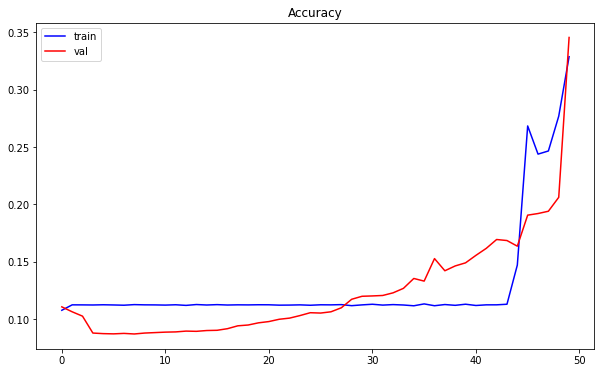

In [13]:
train_model(LeNet_model, X_train, y_train, X_test, y_test)

### 5. Prediction 

In [14]:
import numpy as np

In [15]:
# predict labels for the test set
y_test_pred = []
for i in range(len(X_test)):
  img = X_test[i]
  img = img.reshape(1,28,28,1)
  img = img.astype('float32')
  img = img/255.0
  # one-hot vector output
  vec_p = LeNet_model.predict(img)
  # determine the lable corresponding to vec_p
  y_p = np.argmax(vec_p)
  y_test_pred.append(y_p)

In [16]:
# convert y_test_pred from list to array
y_test_pred = np.asarray(y_test_pred)

Determine the confusion matrix 

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 

Text(51.0, 0.5, 'True classes')

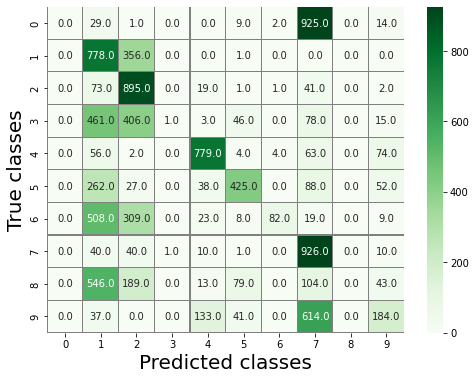

In [18]:
con_mat = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize = (8,6))
sns.heatmap(con_mat, linewidths = 0.1, cmap = 'Greens', linecolor = 'gray', fmt = '.1f', annot = True)
plt.xlabel('Predicted classes', fontsize = 20)
plt.ylabel('True classes', fontsize = 20)

Visualize randomly some images in the test set as well as their predicted labels 

In [19]:
# all categories
cates = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

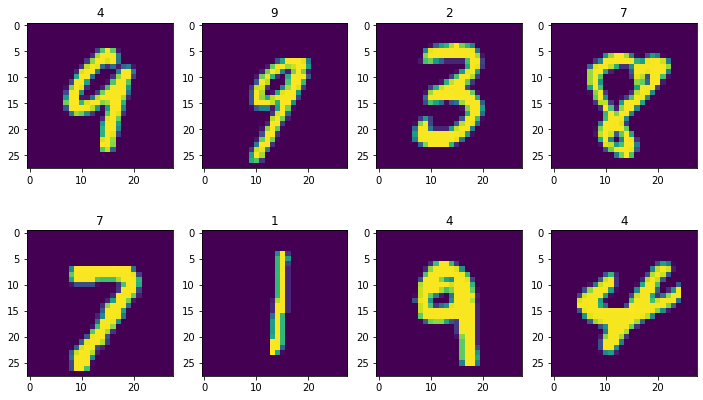

In [20]:
plt.figure(figsize = (12,7))
for i in np.arange(8):
  ind = random.randint(0,len(X_test))
  img = X_test[ind]
  img = img.reshape(1,28,28,1)
  img = img.astype('float32')
  img = img/255.0
  v_p = LeNet_model.predict(img)
  plt.subplot(240+1+i)
  plt.imshow(X_test[ind])
  plt.title(cates[np.argmax(v_p[0])])

## IV. Conclusion
We have discovered the architecture of the LeNet model and how to implement it in Keras. This model is successfully applied for classifying MNIST handwritten digit images with 98,69% of performance. In the next articles, we are going to discover some modern convolutional models as well as their applications in more complicated problems.

**Reference:**

[1]  Le Cun, Y., Boser, B., Denker, J. S., Henderson, D., Howard, R. E., Hubbard, W., & Jackel, L. D. (1989, January). Handwritten digit recognition with a back-propagation network. In Proceedings of the 2nd International Conference on Neural Information Processing Systems (pp. 396–404).